Attara Majesta Ayub (13522139)
Valentino Chryslie Triadi (13522164)

1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

data = pd.read_csv("candy.csv") 

numeric_data = data.select_dtypes(include=[np.number]).iloc[:, 1:]
string_data = data.select_dtypes(include='object')

numeric_stats = pd.DataFrame({
    'Mean': numeric_data.mean(),
    'Median': numeric_data.median(),
    'Mode': numeric_data.mode().iloc[0],
    'Std Deviation': numeric_data.std(),
    'Variance': numeric_data.var(),
    'Range': numeric_data.max() - numeric_data.min(),
    'Minimum': numeric_data.min(),
    'Maximum': numeric_data.max(),
    'Q1': numeric_data.quantile(0.25),
    'Q2': numeric_data.quantile(0.50),
    'Q3': numeric_data.quantile(0.75),
    'IQR': numeric_data.quantile(0.75) - numeric_data.quantile(0.25),
    'Skewness': numeric_data.skew(),
    'Kurtosis': numeric_data.kurtosis()
})

border_style = {
    'selector': 'th',
    'props': [('border', '1px solid black')]
}

print("Statistika Numerik:")
display(numeric_stats.style.set_table_styles([border_style]))

# for column in numeric_data.columns:
#     plt.figure(figsize=(4, 3))
#     numeric_data[column].hist(bins=20, color='skyblue', edgecolor='black')
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()

# for column in numeric_data.select_dtypes(include=np.number):
#     plt.figure(figsize=(4, 3))
#     data[column].hist(bins=20, color='skyblue', edgecolor='black')
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()

string_stats = {}
for column in string_data.columns:
    unique_values = string_data[column].unique()  
    proportion = len(unique_values) / len(string_data[column])
    string_stats[column] = {"unique_values": unique_values, "proportion": proportion}

print("\nStatistika String:\n")
for column, stats in string_stats.items():
    print(f"Kolom: {column}")
    print(f"Jumlah Nilai Unik: {len(stats['unique_values'])}") 
    print(f"Proporsi Nilai Unik: {stats['proportion']:.3f}")
    print(f"Nilai Unik: {stats['unique_values']}")


Statistika Numerik:


,Mean,Median,Mode,Std Deviation,Variance,Range,Minimum,Maximum,Q1,Q2,Q3,IQR,Skewness,Kurtosis
Calories,199.996046,200.001306,195.897565,1.127015,1.270162,8.815673,195.897565,204.713237,199.212548,200.001306,200.777167,1.564619,0.041929,0.198919
Serving,39.989139,39.977855,36.424752,1.073182,1.151719,7.136754,36.424752,43.561506,39.272877,39.977855,40.734991,1.462113,0.031222,-0.119331
Protein,2.974415,2.979177,-0.571292,1.012686,1.025532,6.963319,-0.571292,6.392027,2.245751,2.979177,3.655002,1.409251,0.089544,-0.099028
Sugar,20.004080,20.004798,16.925305,0.888751,0.789878,5.997139,16.925305,22.922444,19.409965,20.004798,20.588626,1.178660,0.006416,-0.048001
Sodium,74.982853,75.000056,71.405873,1.007484,1.015025,6.826428,71.405873,78.232301,74.276512,75.000056,75.677900,1.401387,-0.030713,-0.025462
Fat,6.748226,6.667726,5.162155,0.658202,0.433230,4.336498,5.162155,9.498653,6.279173,6.667726,7.170426,0.891253,0.537265,0.235368
Fiber,0.490851,0.489901,0.000487,0.292242,0.085406,2.999513,0.000487,3.000000,0.238509,0.489901,0.736093,0.497585,0.324107,1.396380
Popularity,49.967119,49.955385,-3.000000,10.145767,102.936586,89.469784,-3.000000,86.469784,42.948183,49.955385,57.153024,14.204841,-0.148562,0.807764



Statistika String:

Kolom: Flavour
Jumlah Nilai Unik: 4
Proporsi Nilai Unik: 0.002
Nilai Unik: ['Vanilla' 'Strawberry' 'Chocolate' 'undefined']


2. Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

Kita dapat mengidentifikasi outlier berdasarkan Interquartile Range (IQR). DIlakukan dengan menghitung perbedaan antara kuartil ketiga (Q3) dan kuartil pertama (Q1), yang merupakan ukuran penyebaran data di antara seperempat bagian teratas dan terbawah dari dataset. Titik data di luar rentang yang dibentuk oleh batas bawah dan batas atas dianggap sebagai outlier.

In [2]:
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

outliers_count = ((numeric_data < lower_threshold) | (numeric_data > upper_threshold)).sum()

print("Number of outliers in each column:")
print(outliers_count)

Number of outliers in each column:
Calories      15
Serving       11
Protein       12
Sugar         13
Sodium        13
Fat           20
Fiber          1
Popularity    12
dtype: int64


    Cara menangani data outlier
    
    - Penghapusan Outlier: Outlier dihapus dari dataset. Namun, ini harus dilakukan dengan hati-hati karena dapat menyebabkan kehilangan informasi penting. Penghapusan outlier biasanya digunakan jika outlier disebabkan oleh kesalahan dalam pengukuran atau entri data.

    - Transformasi Data: Data dapat ditransformasikan menggunakan teknik seperti logaritma atau akar kuadrat untuk menyeimbangkan distribusi data dan mengurangi dampak outlier.

    - Winsorization: Nilai outlier diganti dengan nilai maksimum atau minimum yang ditentukan sebelumnya dalam distribusi data. Ini dapat meminimasi dampak outlier tanpa menghapusnya sepenuhnya.

    - Clustering: Outlier dikelompokkan bersama dalam kategori baru. Ini valid jika outlier bisa mewakili kelompok data yang berbeda.

    - Metode Statistik Robust: Metode statistik yang lebih tahan terhadap outlier, seperti median sebagai pengukur tendensi sentral, atau metode quartil untuk mengukur penyebaran.

3. Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram. 

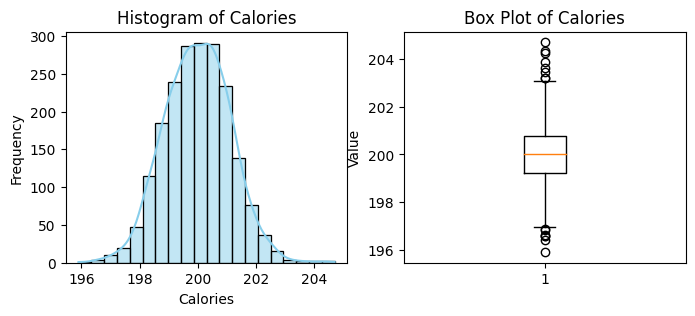

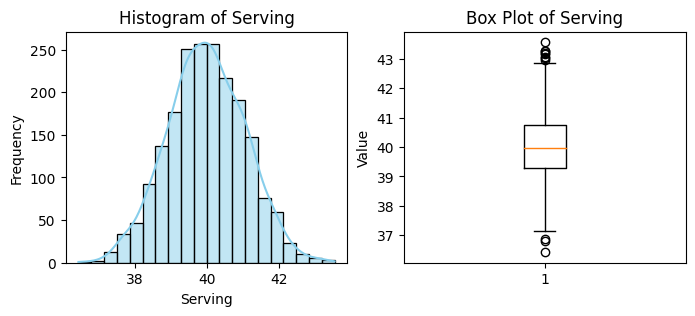

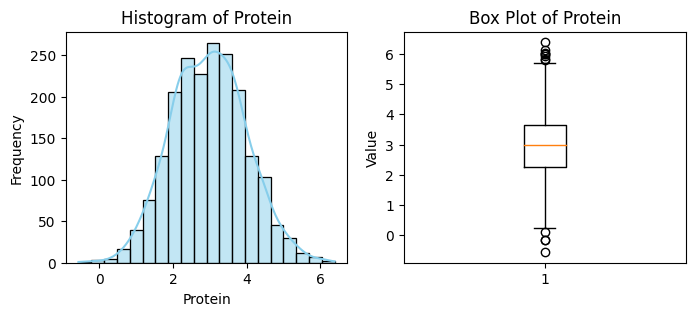

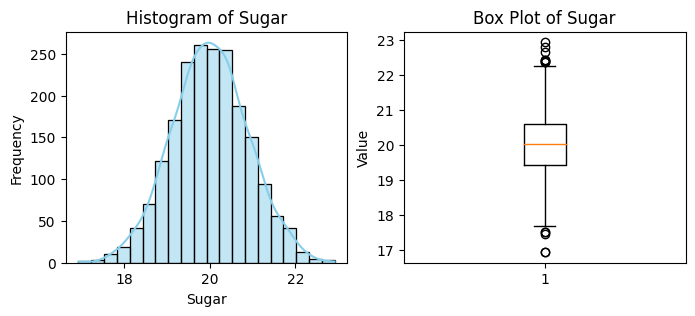

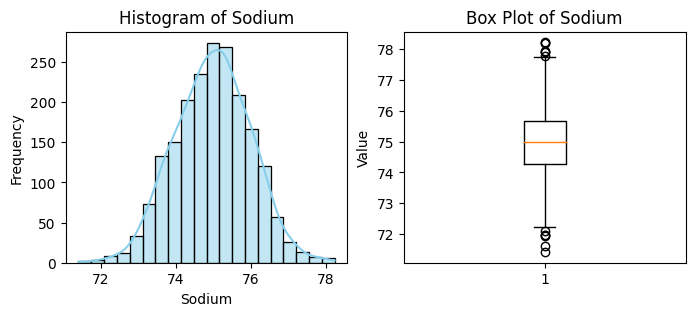

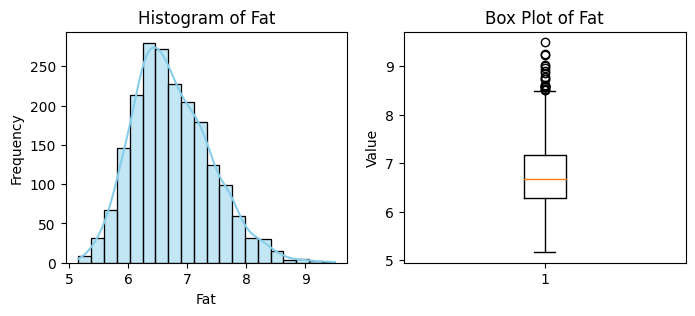

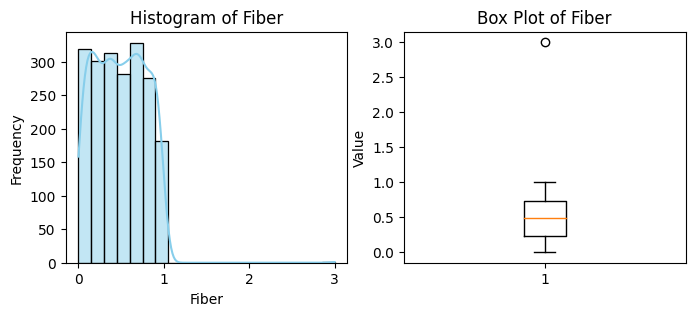

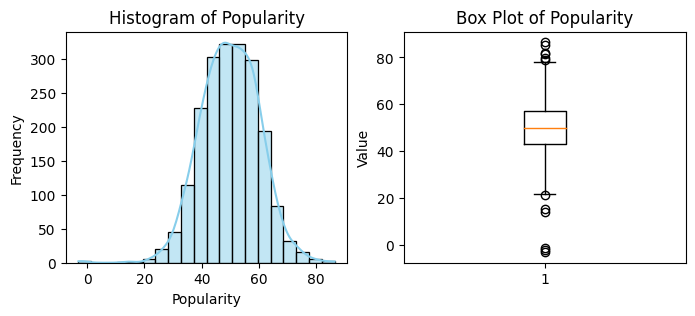

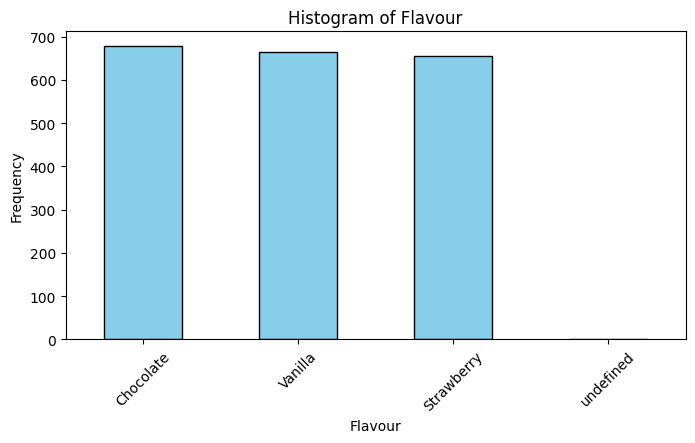

In [3]:
import seaborn as sns

# Numeric data plot
for column in numeric_data.columns:
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))

    sns.histplot(numeric_data[column], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    
    axes[1].boxplot(numeric_data[column])
    axes[1].set_title(f'Box Plot of {column}')
    axes[1].set_ylabel('Value')
    
    plt.show()

# String data plot
for column in string_data.columns:
    plt.figure(figsize=(8, 4))
    string_data[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


4. Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

Identifikasi hasil visualisasi histogram dapat menggunakan definisi berikut:

Distribusi Normal (Gaussian): Histogram memiliki bentuk lonceng (bell-shaped) dengan puncaknya di tengah dan simetris di sekitarnya. Distribusi normal memiliki nilai rata-rata (mean) dan standar deviasi yang dapat digunakan untuk mendeskripsikan sebaran data.

Distribusi Skewed (Condong): Histogram memiliki ekor yang lebih panjang ke satu sisi daripada yang lain, sehingga tidak simetris. Distribusi skewness dapat berupa positive skew (ekor ke kanan) atau negative skew (ekor ke kiri).

Distribusi Bimodal (Dua Puncak): Histogram memiliki dua puncak yang jelas, menunjukkan bahwa data memiliki dua kelompok utama.

Distribusi Uniform (Seragam): Histogram memiliki distribusi yang merata, tanpa ada kelompok atau puncak yang jelas.

Analisis:
a. Visualisasi kolom Calories, Serving, dan Sugar memenuhi Gaussian. Sehingga kolom-kolom tersebut disebut terdistribusi normal.
b. Visualisasi kolom Fat adalah Positive Skewed
c. Visualisasi kolom Popularity, Sodium, Fiber, dan Flavor adalah Negative Skewed